# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Fitri Ning Alisia
- Email: fitrialisiaa@gmail.com
- Id Dicoding / Username: fitrialisia 

### Keterangan Dataset Yang Dipakai

In [7]:
file_readme = "dashboard/data/Readme.txt"

In [8]:
with open(file_readme, "r") as file:
    isi_file = file.read()
    print(isi_file)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

## Menentukan Pertanyaan Bisnis

- Seberapa signifikan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?
- Bagaimana efek musim terhadap jumlah total penyewaan sepeda ?
- Bagaimana efek cuaca terhadap jumlah total penyewaan sepeda ?

## Menyaipkan semua library yang dibuthkan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat dataframe bike_day_df yang berisikan isi dari file day.csv terkait bike sharing counts aggregated on daily basis

In [10]:
bike_day_df = pd.read_csv("dashboard/data/day.csv")
bike_day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Membuat dataframe bike_hour_df yang berisikan isi dari file hour.csv terkait bike sharing counts aggregated on hourly basis

In [11]:
bike_hour_df = pd.read_csv("dashboard/data/hour.csv")
bike_hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Assessing Data

#### Dataset Information

In [12]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada dataframe bike_day_df memiliki 16 feature atau column dan 731 nilai non-null dalam setiap feature-feature yang ada. feature yang memiliki tipe data int64 sebanyak 11 sedangkan dengan feature yang memiliki tipe data float64 sebanyak 4. Pada feature dteday terjadi kesalahan tipe data karena tertera tipe datanya object yang harus dirubah menjadi datetime64

In [13]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada dataframe bike_hour_df memiliki 17 feature atau column dan 17379 nilai non-null dalam setiap feature-feature yang ada. feature yang memiliki tipe data int64 sebanyak 12 sedangkan dengan feature yang memiliki tipe data float64 sebanyak 4. Pada feature dteday terjadi kesalahan tipe data karena tertera tipe datanya object yang harus dirubah menjadi datetime64

#### Checking Missing Value

In [14]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak Terdapat Missing Value pada kedua dataframe yang ada

#### Checking Duplicated Data

In [16]:
print("Jumlah duplikasi data pada dataframe bike_day_df : ", bike_day_df.duplicated().sum())
print("Jumlah duplikasi data pada dataframe bike_hour_df : ", bike_hour_df.duplicated().sum())

Jumlah duplikasi data pada dataframe bike_day_df :  0
Jumlah duplikasi data pada dataframe bike_hour_df :  0


Tidak terdapat dupilikasi data pada kedua dataframe yang ada

#### Statistical Description of the Dataset

In [17]:
bike_day_df.describe(include="all")

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

pada feature "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data maka dari itu data yang ditampilkan rangenya tidak sesuai dengan kenyataan yang ada. Pada feature "season", "yr", dan "weathersit" telah mengalami label encoding sedangkan feature "holiday" dan "workingday" nilainya boolean (0/1). Kesimpulannya Tidak terdapatnya keanehan dalam ringkasan parameter statistik dari bike_day_df setiap fitur tertampil normal sesuai jika ditinjau juga dari data characteristic pada file readme yang ada.

In [18]:
bike_hour_df.describe(include="all")

instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered           cnt  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

pada feature "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data maka dari itu data yang ditampilkan rangenya tidak sesuai dengan kenyataan yang ada. Pada feature "season", "yr", dan "weathersit" telah mengalami label encoding sedangkan feature "holiday" dan "workingday" nilainya boolean (0/1). Kesimpulannya Tidak terdapatnya keanehan dalam ringkasan parameter statistik dari bike_hour_df setiap fitur tertampil normal sesuai jika ditinjau juga dari data characteristic pada file readme yang ada.

### Cleaning Data

#### Fixing Data Type on the "dteday" Feature to Datetime in Both Dataframes

In [19]:
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])

In [20]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Exploration on the "bike_day_df"

#### 1. Correlation Matrix

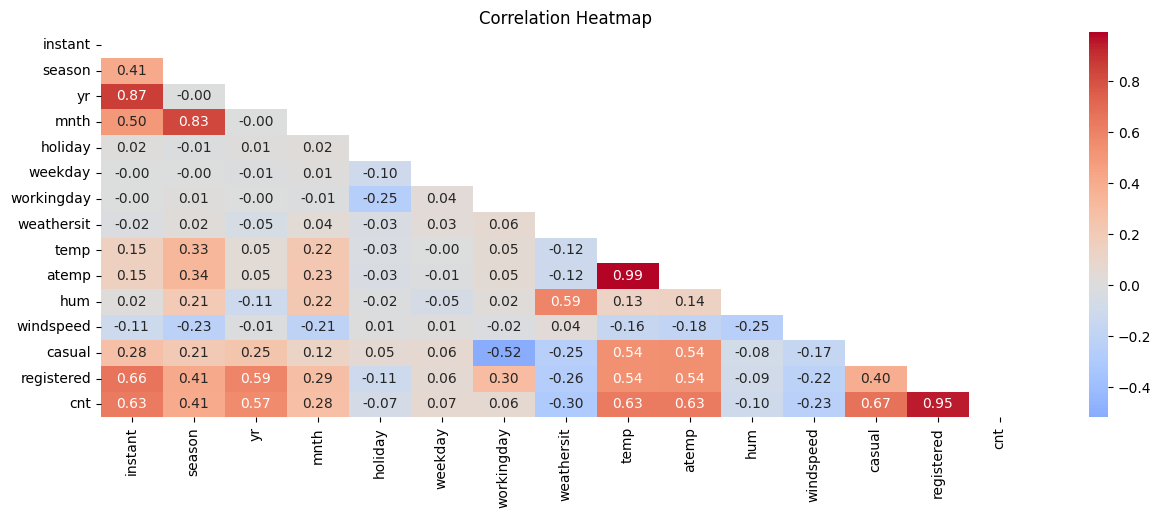

In [22]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = bike_day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. berikut fitur yang memiliki korelasi positive yang kuat yaitu
    - "temp" dengan "atemp"
    - "cnt" dengan "registered"
    - "instant" dengan "yr"
    - "season" dengan "mnth"
2. fitur yang memiliki korelasi yang kuat dengan total sepeda sewa termasuk baik yang sewa harian maupun yang terdaftar ("cnt") yaitu
    - "registered"
    - "casual"
    - "atemp"
    - "temp"
    - "instant"
3. Semakin warnanya membiru berati antar kedua fitur tersebut tidak memiliki relasi

#### 2. Scatter Plot

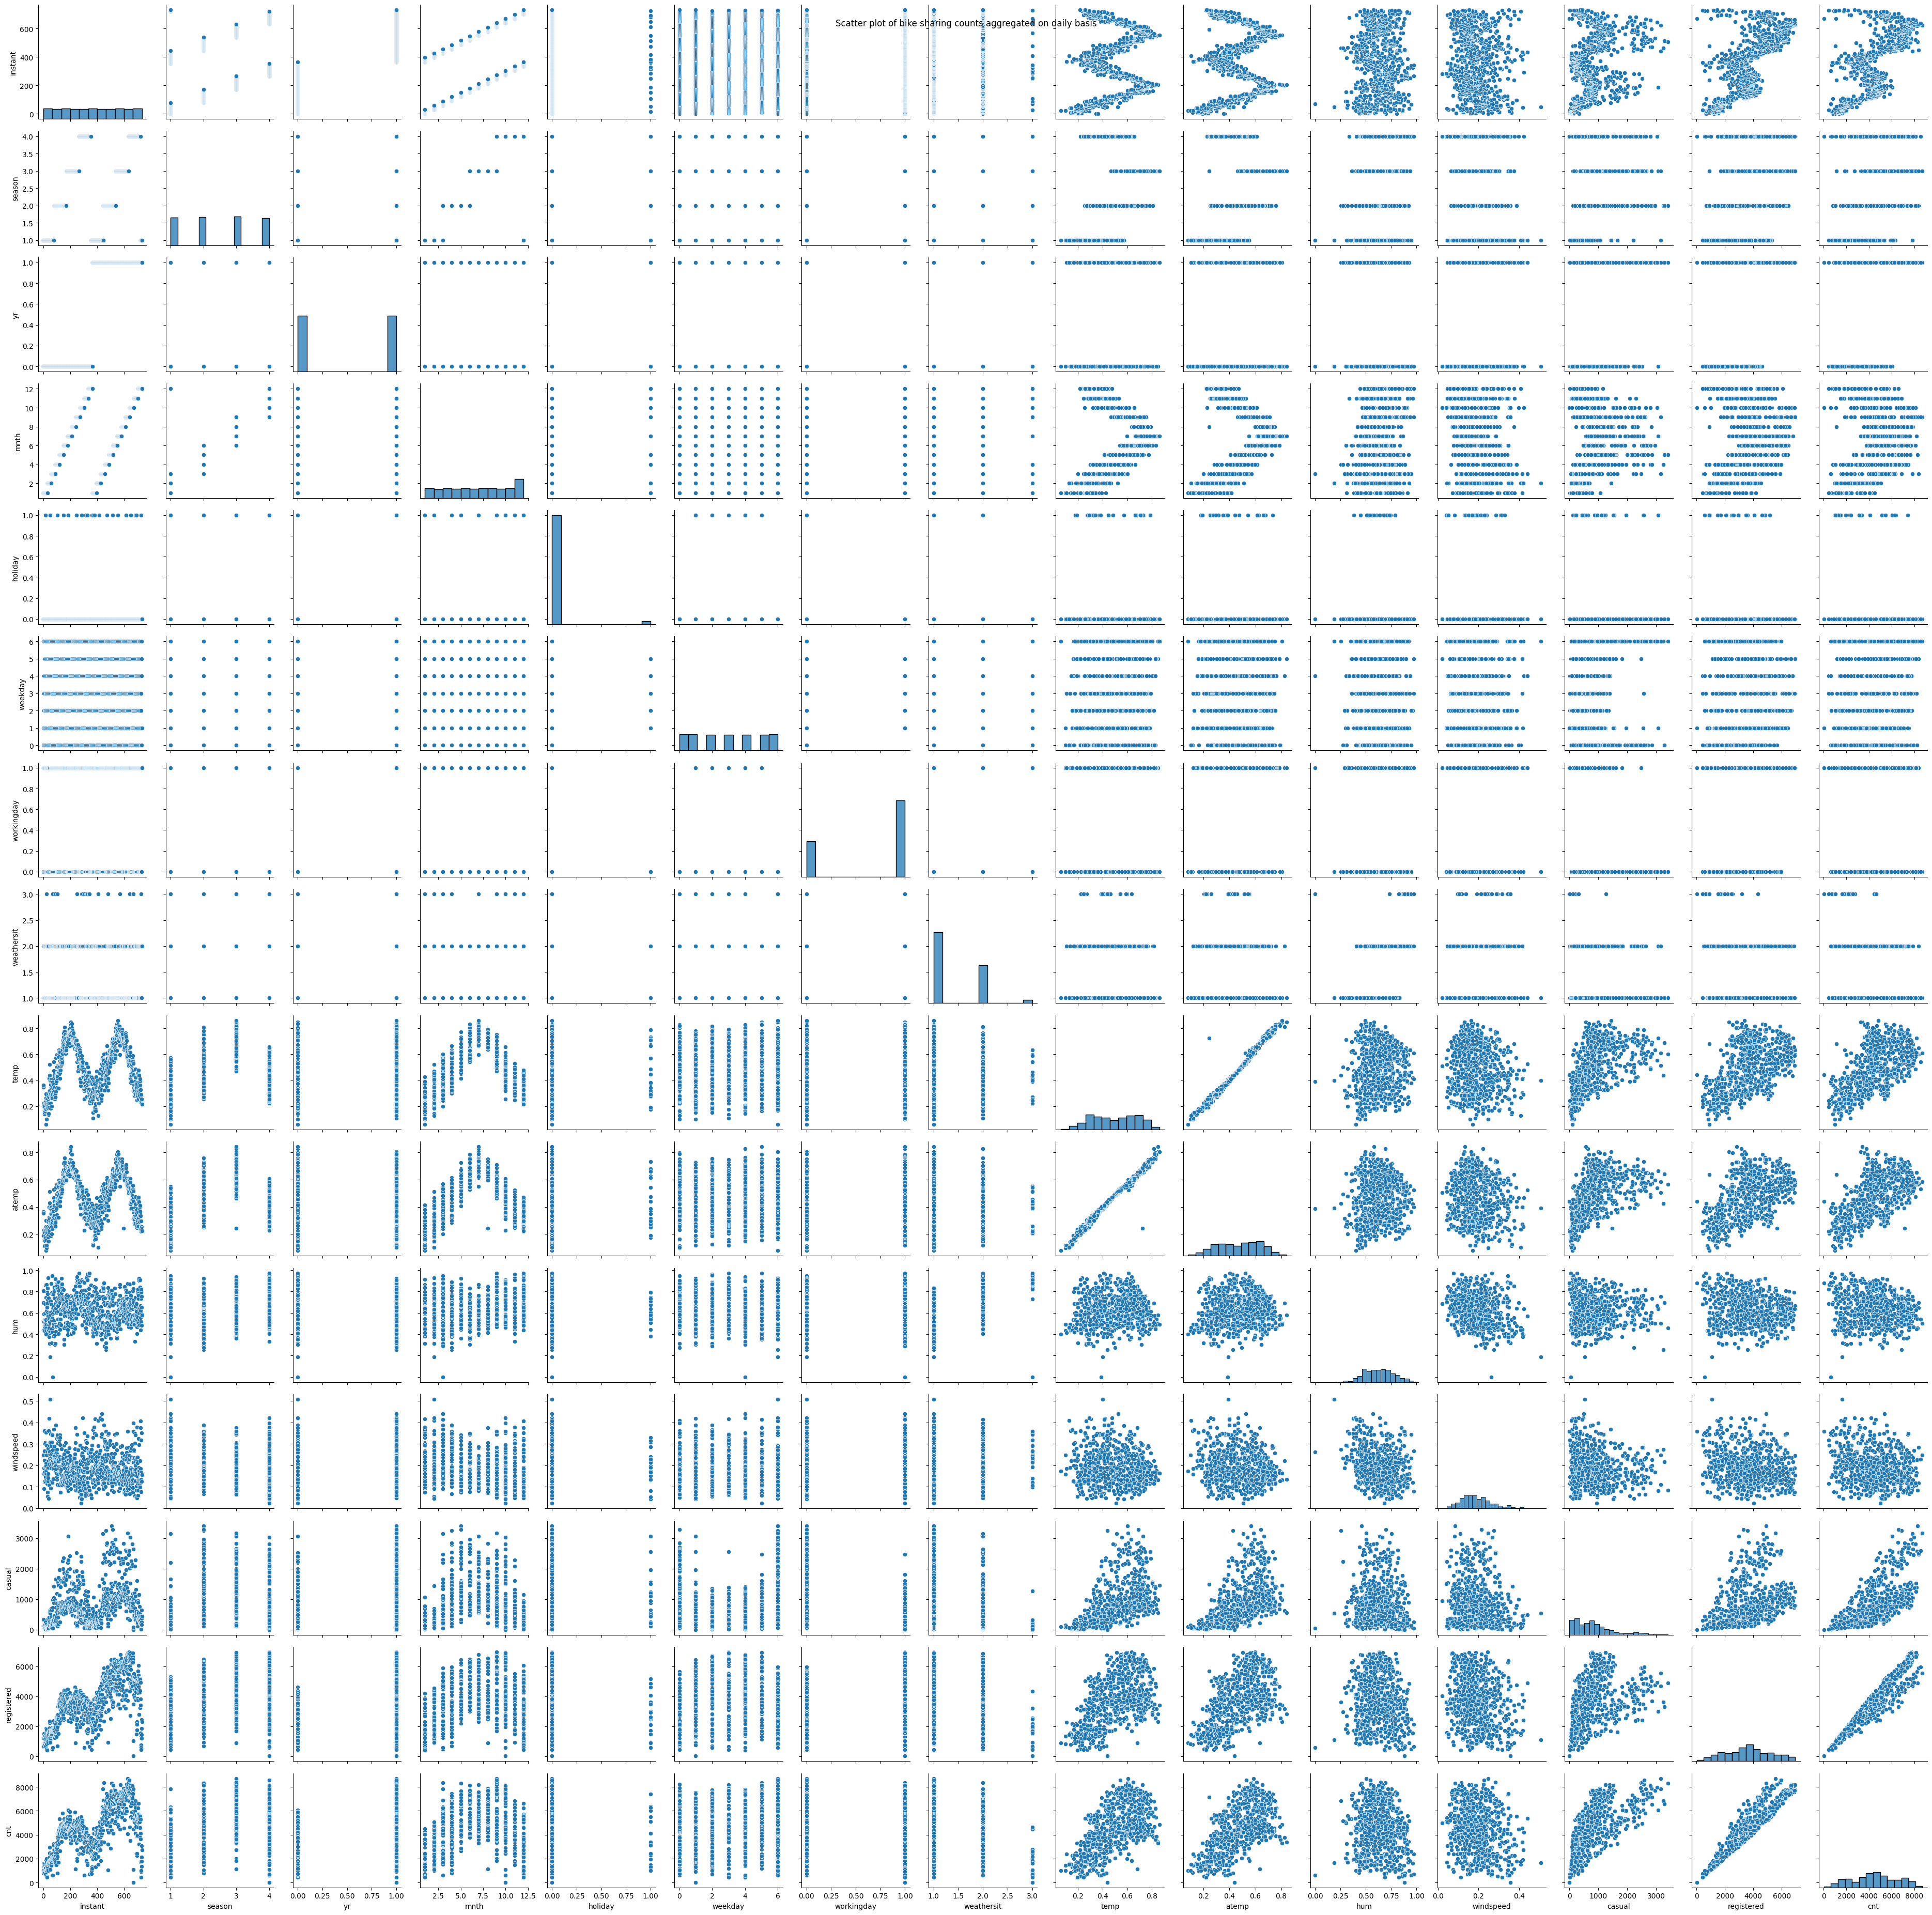

In [23]:
g = sns.pairplot(bike_day_df)
g.fig.suptitle("Scatter plot of bike sharing counts aggregated on daily basis")
plt.tight_layout()
plt.show()

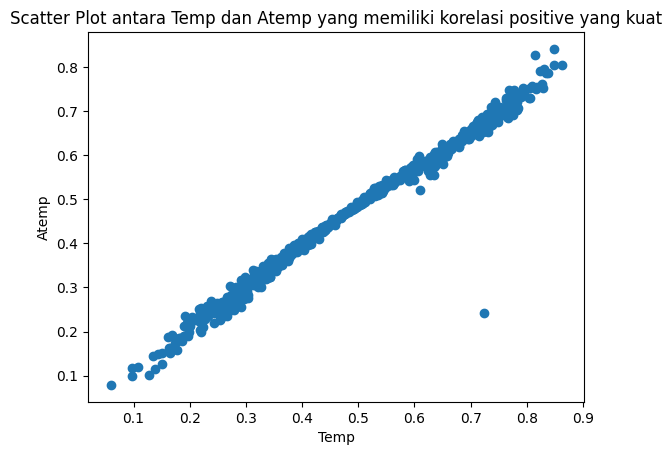

In [24]:
plt.scatter(bike_day_df["temp"], bike_day_df["atemp"])
plt.xlabel("Temp")
plt.ylabel("Atemp")
plt.title("Scatter Plot antara Temp dan Atemp yang memiliki korelasi positive yang kuat")
plt.show()

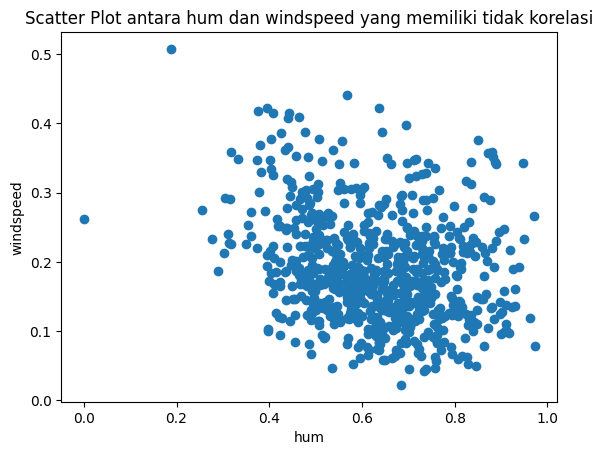

In [25]:
plt.scatter(bike_day_df["hum"], bike_day_df["windspeed"])
plt.xlabel("hum")
plt.ylabel("windspeed")
plt.title("Scatter Plot antara hum dan windspeed yang memiliki tidak korelasi")
plt.show()

#### 3. Data Distribution

In [26]:
bike_day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

# Proses Decoding pada Feature yang telah terjadi proses Encoding

Saya tidak melakukan decoding pada feature "weathersit" karena pada 1 label memiliki beberapa macam value berikut penjelasannya tiap tiap label: 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [27]:
daily_categorical_data = bike_day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

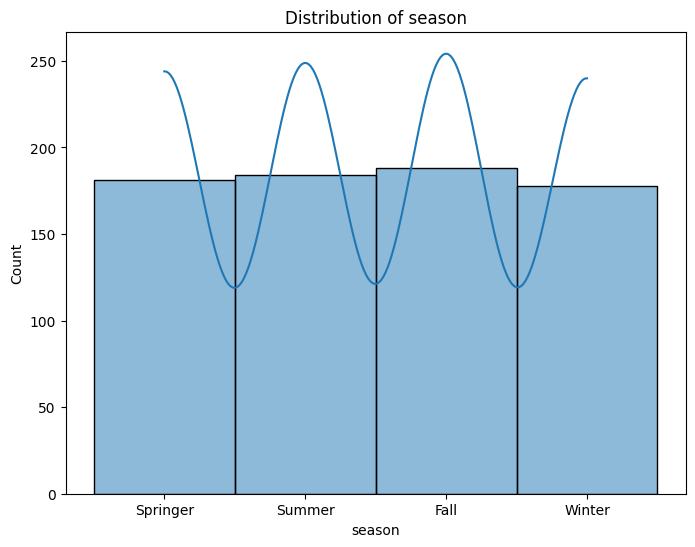

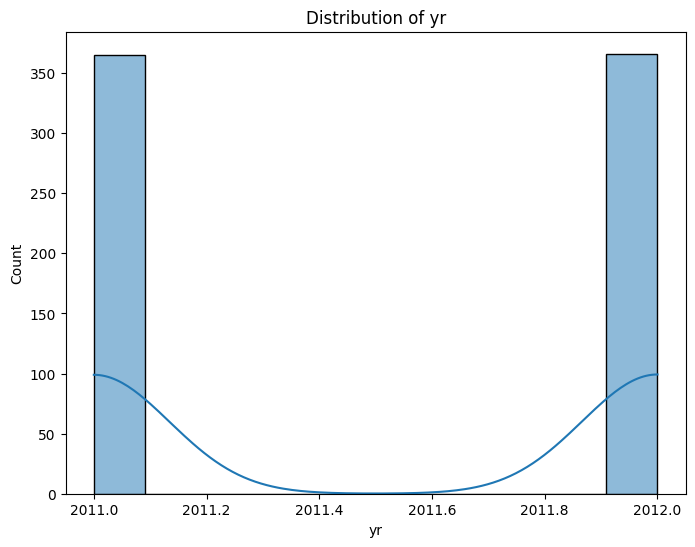

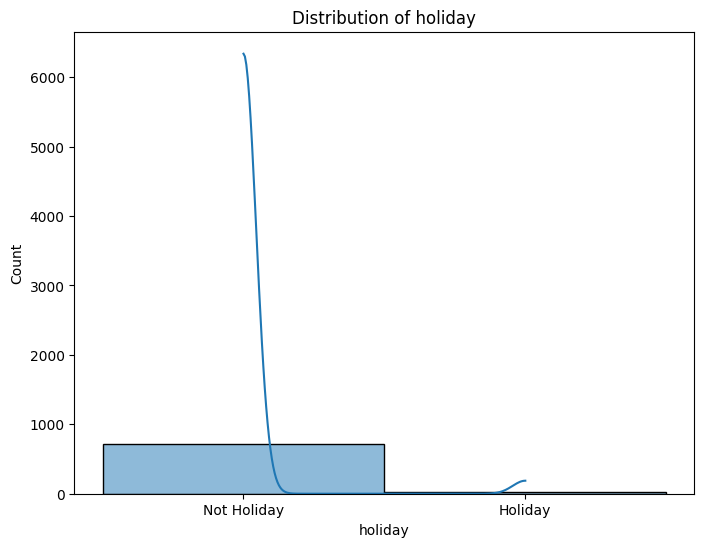

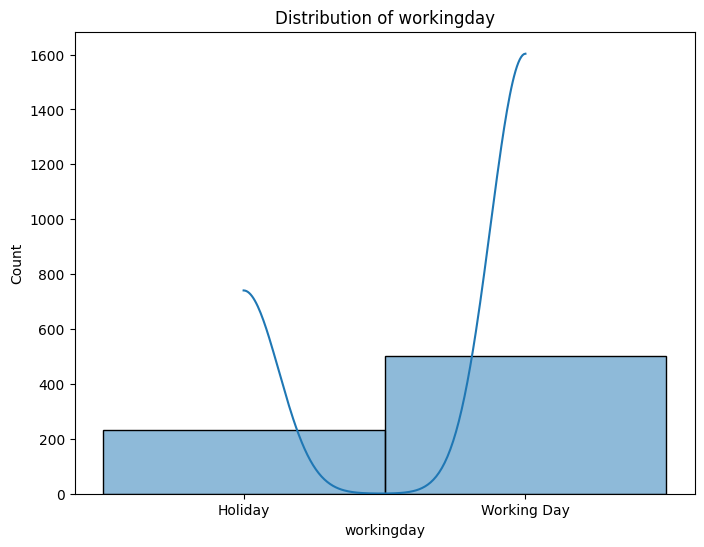

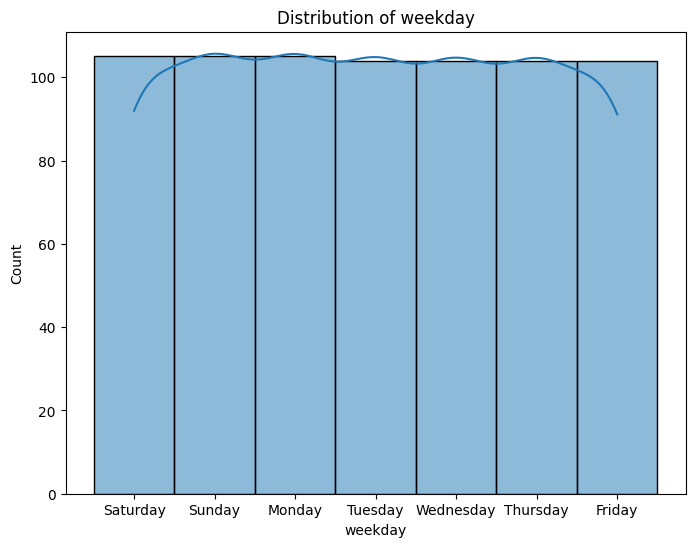

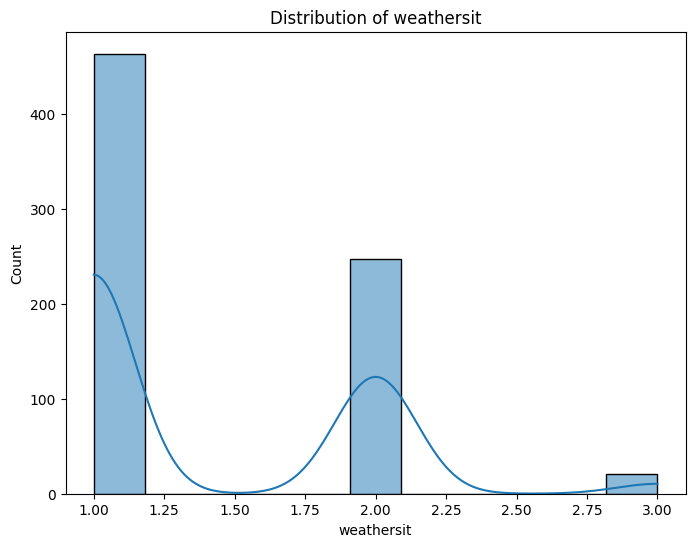

In [28]:
for column in daily_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Feature Holiday memiliki bentuk histogram yang Right Skewed Distribution
- Feature Workingday memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Right Skewed Distribution
- Selain feature diatas diidentifikasi no skew Distribution

In [29]:
bike_day_df["temp"] = bike_day_df["temp"].multiply(41)
bike_day_df["atemp"] = bike_day_df["atemp"].multiply(50) 
bike_day_df["hum"] = bike_day_df["hum"].multiply(100) 
bike_day_df["windspeed"] = bike_day_df["windspeed"].multiply(67) 

# # Proses Denormalisasi pada Feature yang telah terjadi proses Normalisasi

In [30]:
daily_num_data = bike_day_df[["temp","atemp","hum","windspeed"]]

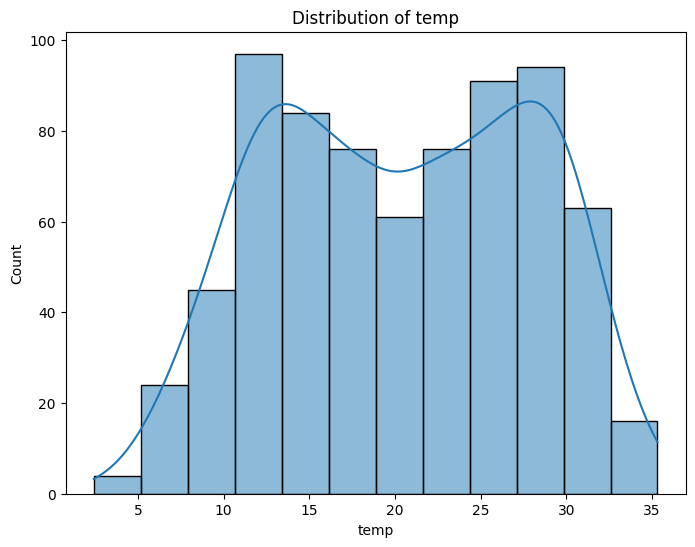

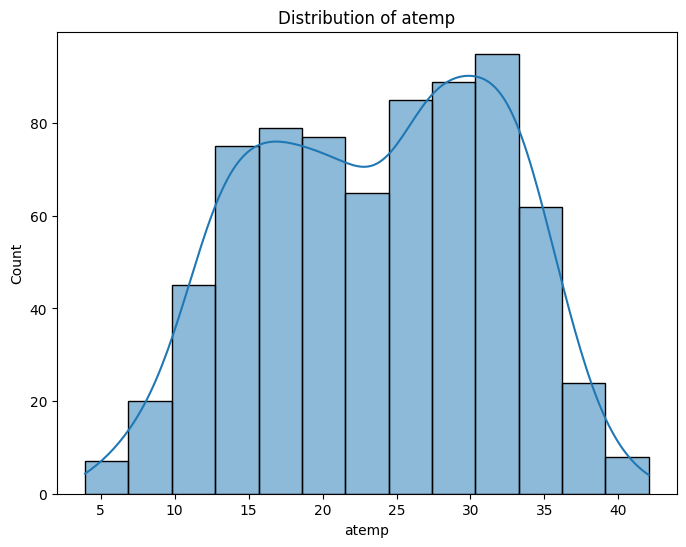

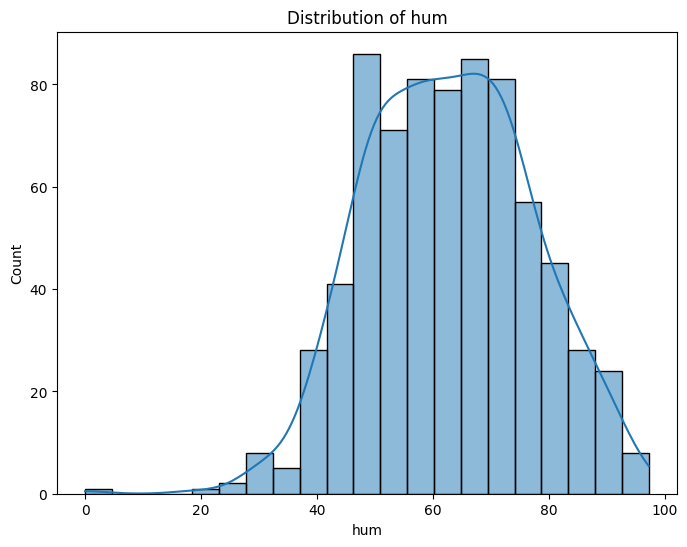

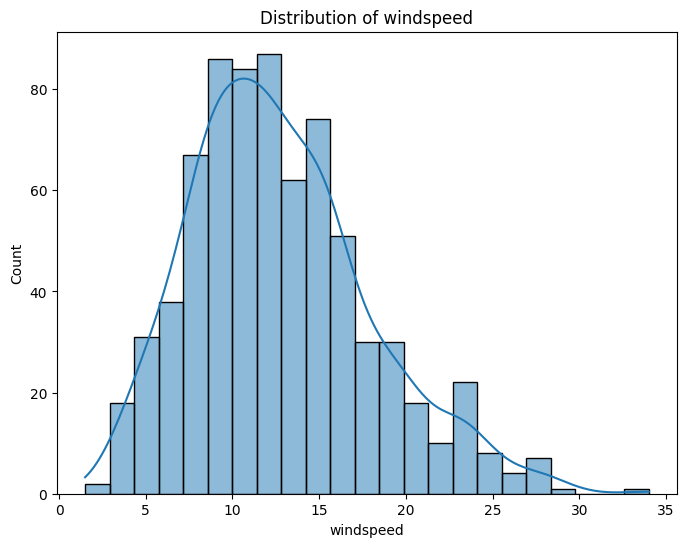

In [31]:
for column in daily_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Feature temp memiliki bentuk histogram yang Left Skewed Distribution
- Feature atemp memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Left Skewed Distribution
- Feature windspeed memiliki bentuk histogram yang Right Skewed Distribution

### Exploration on the "bike_hour_df"

#### 1. Correlation Matrix

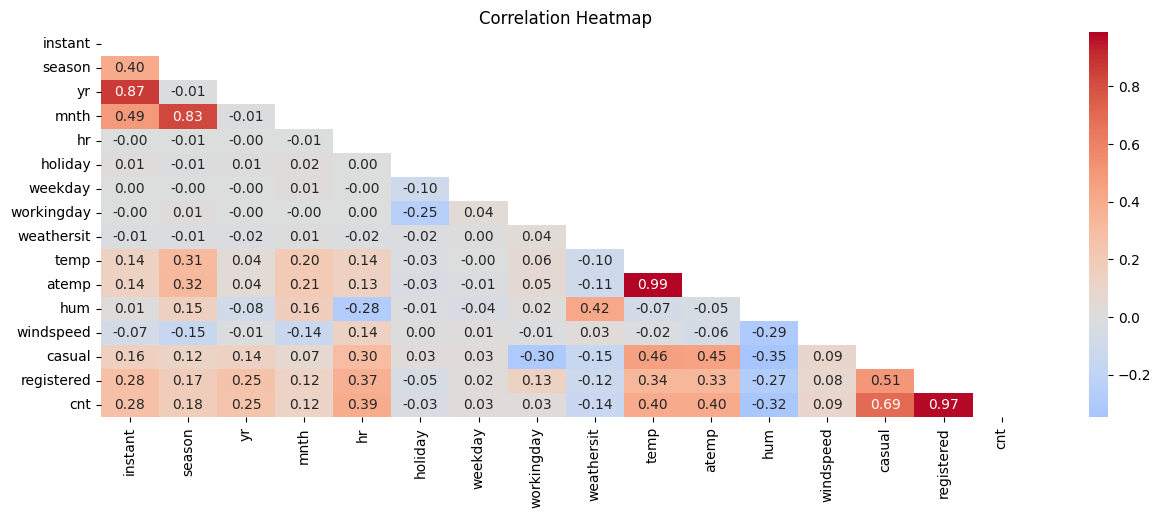

In [32]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = bike_hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. berikut fitur yang memiliki korelasi positive yang kuat yaitu
    - "temp" dengan "atemp"
    - "cnt" dengan "registered"
    - "instant" dengan "yr"
    - "season" dengan "mnth"
2. fitur yang memiliki korelasi yang kuat dengan total sepeda sewa termasuk baik yang sewa harian maupun yang terdaftar ("cnt") yaitu
    - "registered"
    - "casual"
3. Semakin warnanya membiru berati antar kedua fitur tersebut tidak memiliki relasi

#### 2. Scatter Plot

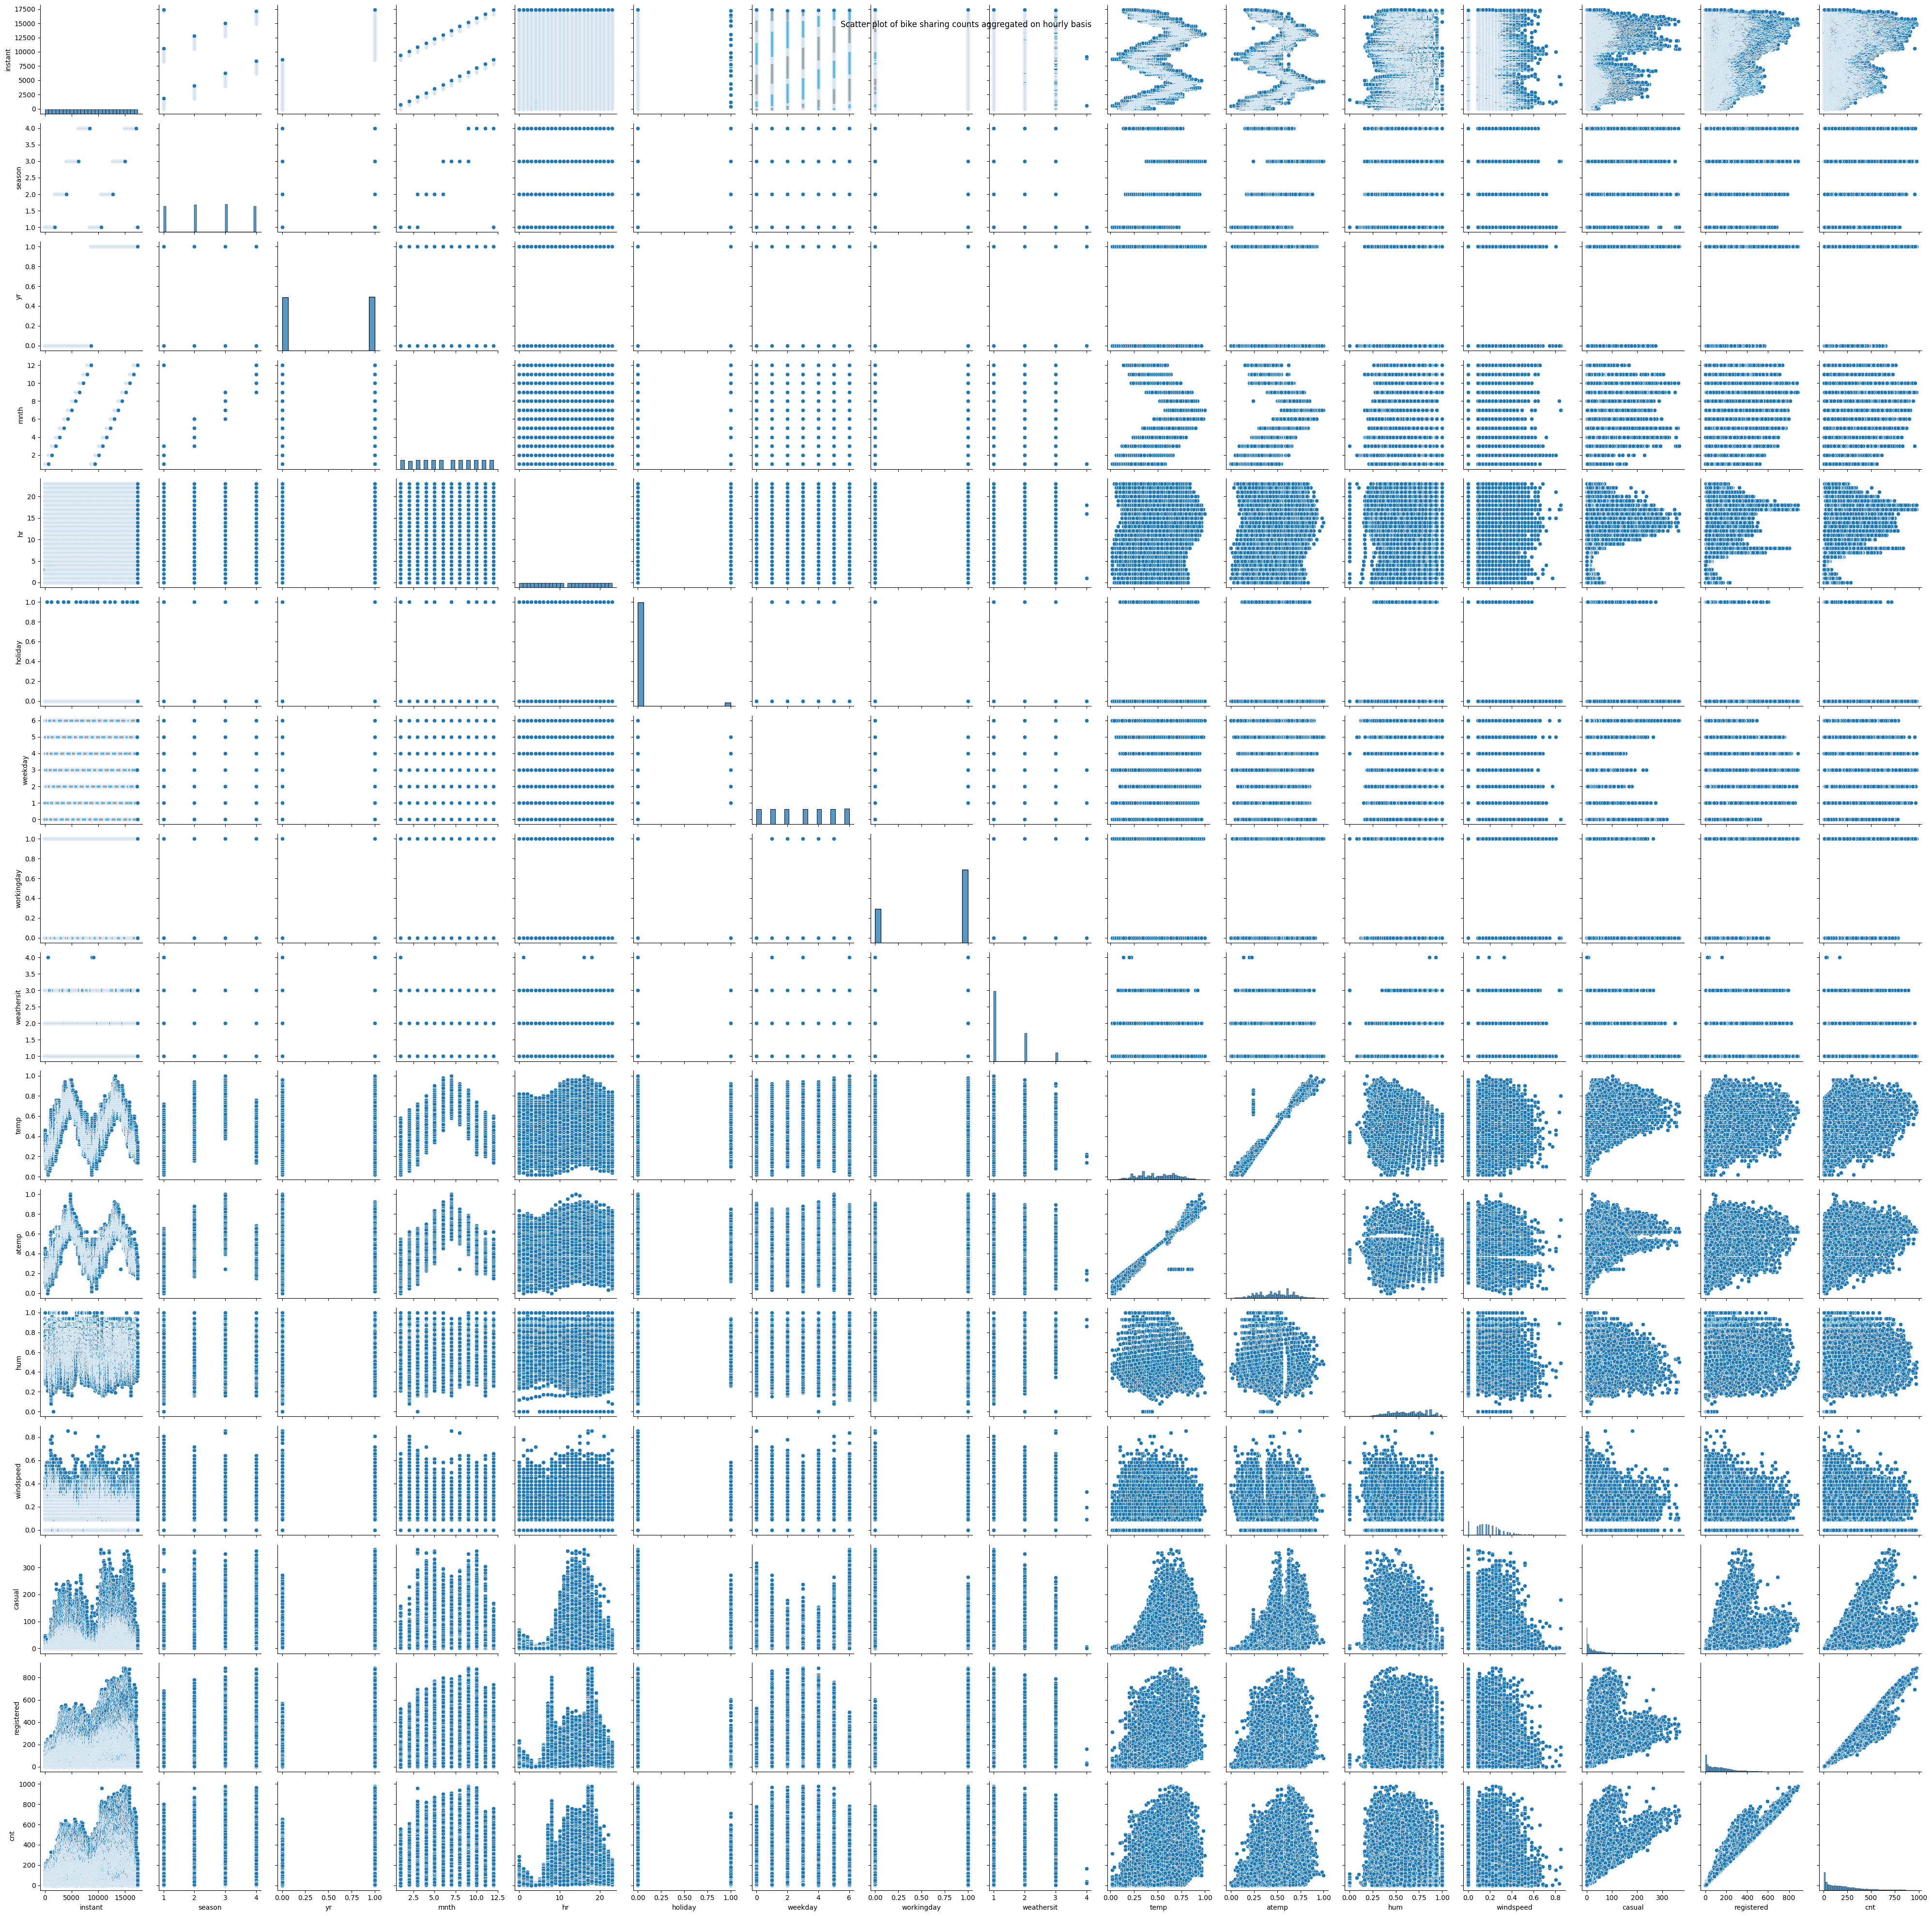

In [33]:
g = sns.pairplot(bike_hour_df)
g.fig.suptitle("Scatter plot of bike sharing counts aggregated on hourly basis")
plt.tight_layout()
plt.show()

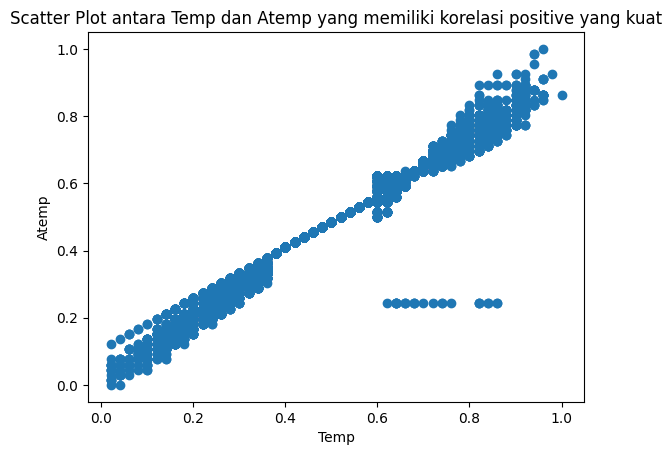

In [34]:
plt.scatter(bike_hour_df["temp"], bike_hour_df["atemp"])
plt.xlabel("Temp")
plt.ylabel("Atemp")
plt.title("Scatter Plot antara Temp dan Atemp yang memiliki korelasi positive yang kuat")
plt.show()

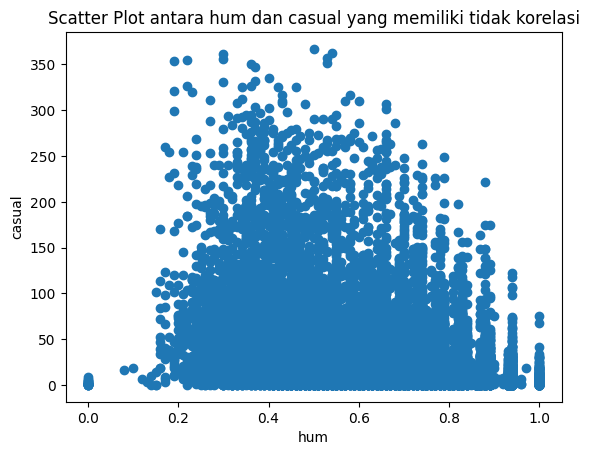

In [35]:
plt.scatter(bike_hour_df["hum"], bike_hour_df["casual"])
plt.xlabel("hum")
plt.ylabel("casual")
plt.title("Scatter Plot antara hum dan casual yang memiliki tidak korelasi")
plt.show()

#### 3. Data Distribution

In [36]:
bike_hour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

Saya tidak melakukan decoding pada feature "weathersit" karena pada 1 label memiliki beberapa macam value berikut penjelasannya tiap tiap label: 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [37]:
hour_categorical_data = bike_hour_df[["season","yr","holiday","workingday","weekday","weathersit"]]

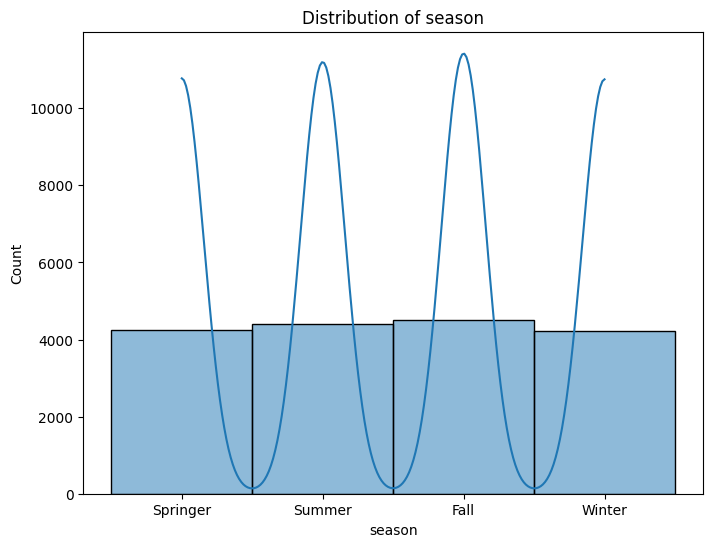

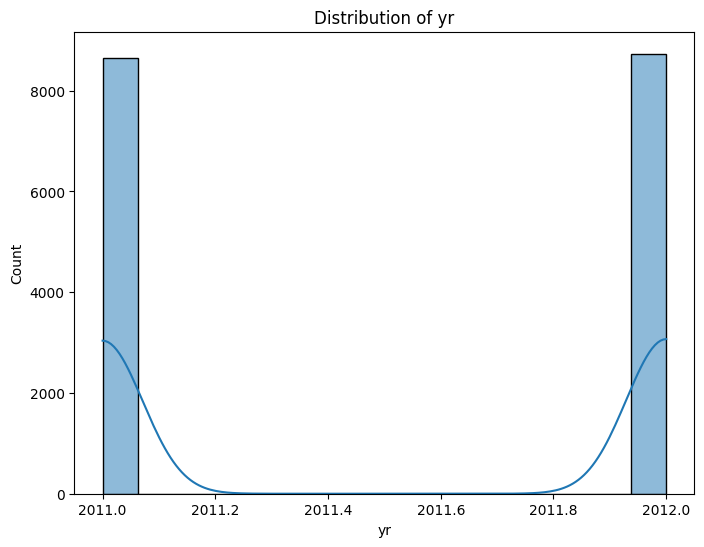

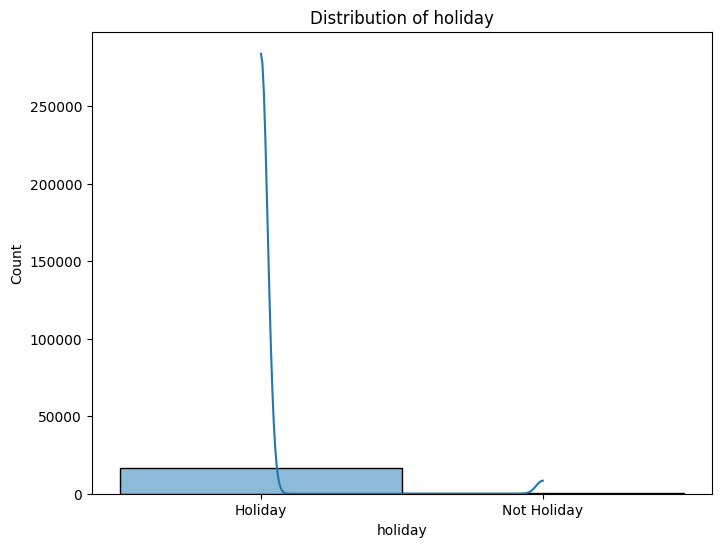

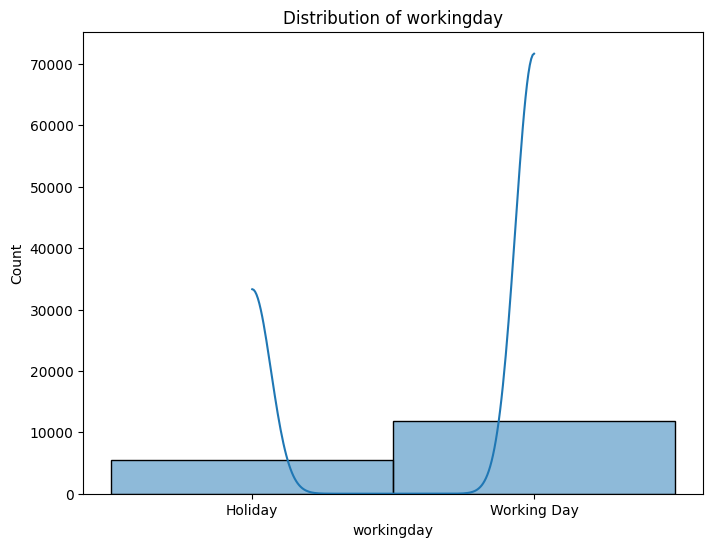

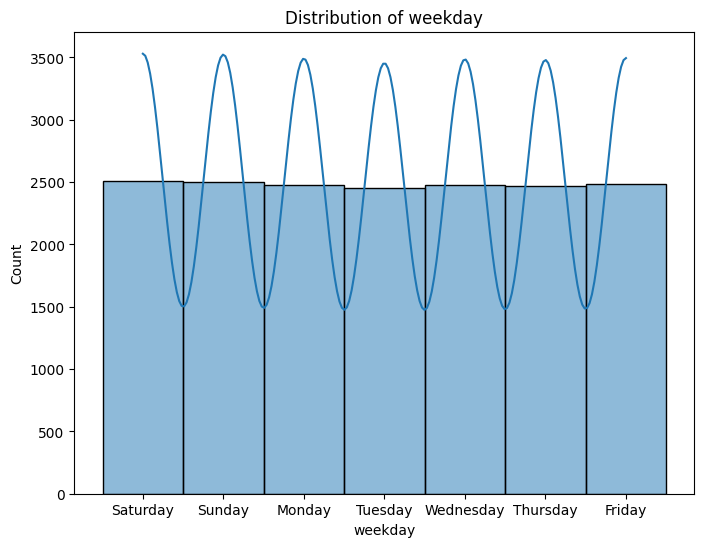

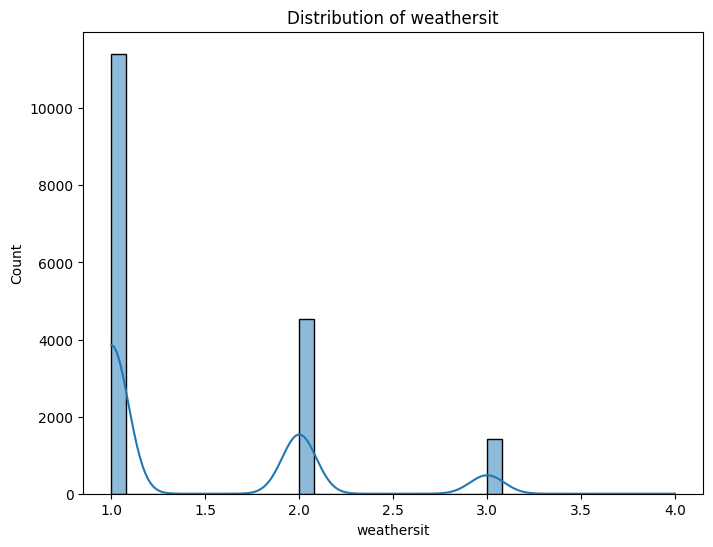

In [38]:
for column in hour_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(hour_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Feature Holiday memiliki bentuk histogram yang Right Skewed Distribution
- Feature Workingday memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Right Skewed Distribution
- Selain feature diatas diidentifikasi no skew Distribution

In [39]:
bike_hour_df["temp"] = bike_hour_df["temp"].multiply(41)
bike_hour_df["atemp"] = bike_hour_df["atemp"].multiply(50) 
bike_hour_df["hum"] = bike_hour_df["hum"].multiply(100) 
bike_hour_df["windspeed"] = bike_hour_df["windspeed"].multiply(67) 

In [40]:
hour_num_data = bike_hour_df[["temp","atemp","hum","windspeed"]]

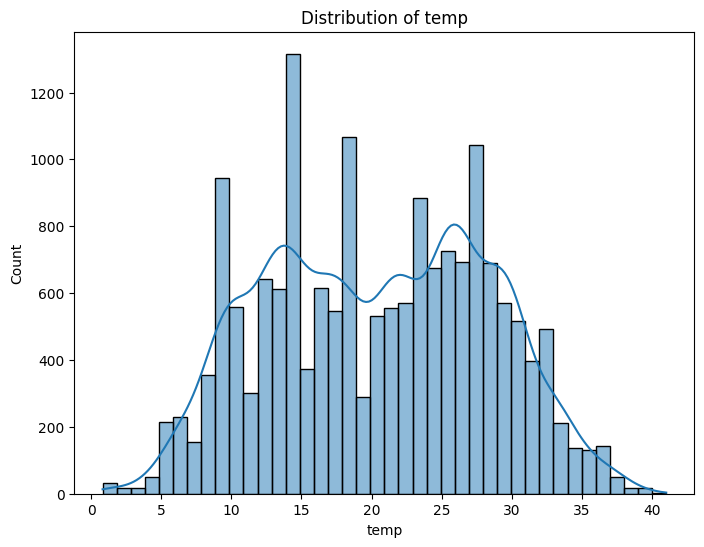

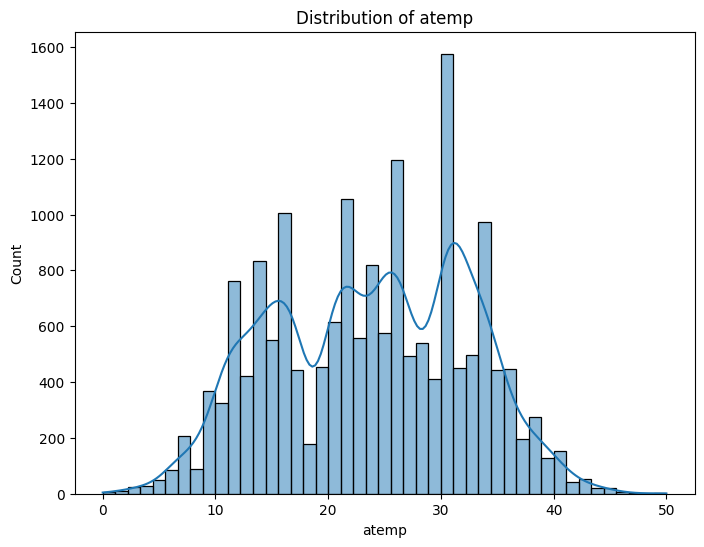

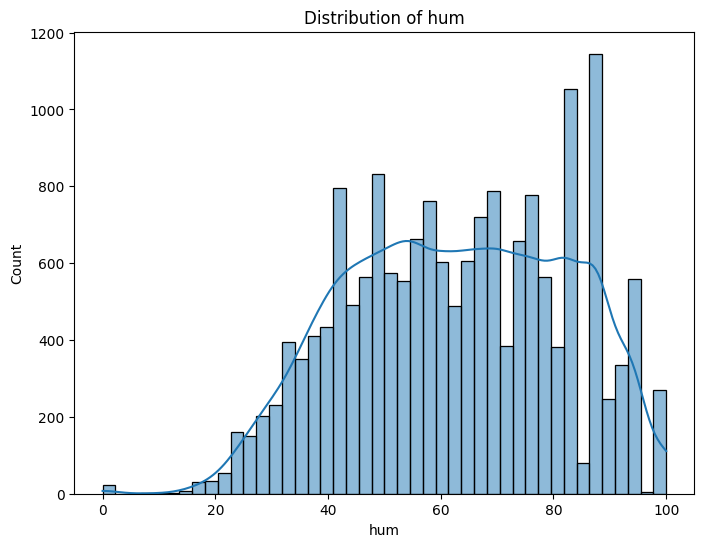

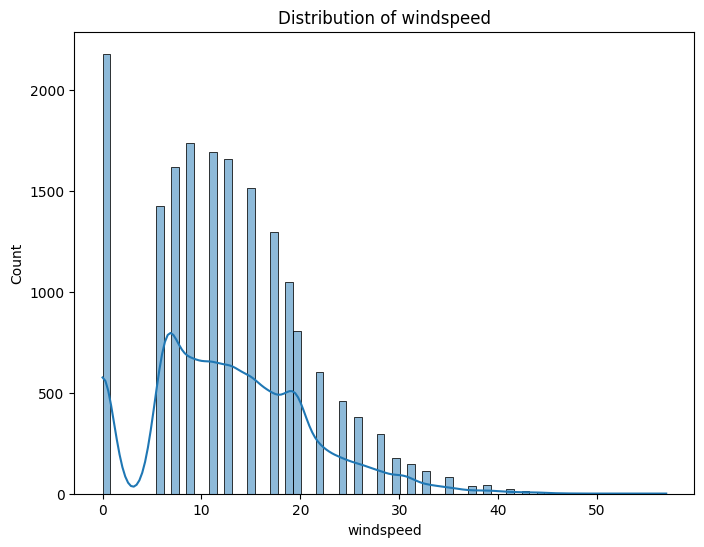

In [41]:
for column in hour_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hour_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Feature temp memiliki bentuk histogram yang Left Skewed Distribution
- Feature atemp memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Left Skewed Distribution
- Feature windspeed memiliki bentuk histogram yang Right Skewed Distribution

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa signifikan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?

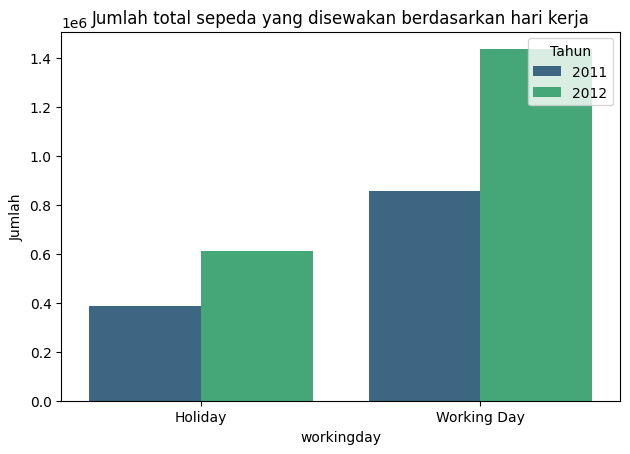

In [42]:
working_counts = bike_day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()  

sns.barplot(data=working_counts, x="workingday", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari kerja")
plt.legend(title="Tahun", loc="upper right")  
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana efek musim terhadap jumlah total penyewaan sepeda ?

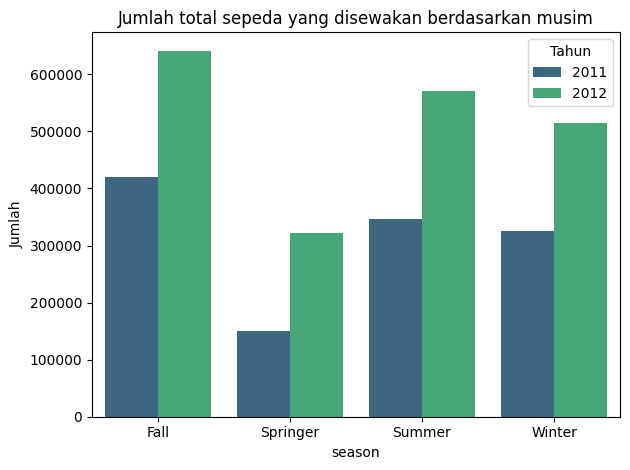

In [43]:
season_counts = bike_day_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()  

sns.barplot(data=season_counts, x="season", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan musim")
plt.legend(title="Tahun", loc="upper right")  
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana efek cuaca terhadap jumlah total penyewaan sepeda ?

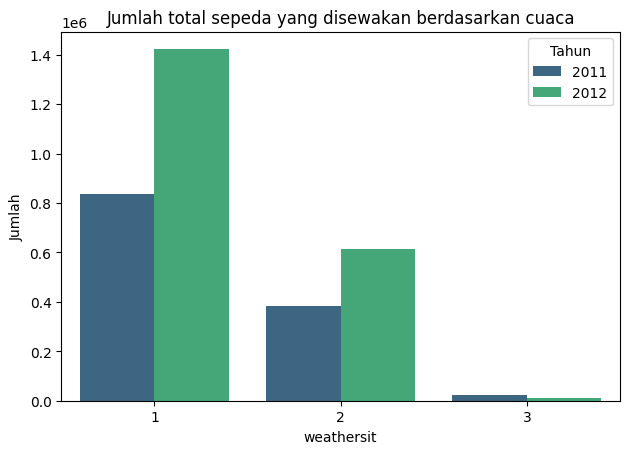

In [44]:
weather_counts = bike_day_df.groupby(by=["weathersit", "yr"]).agg({
    "cnt": "sum"
}).reset_index()  


sns.barplot(data=weather_counts, x="weathersit", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan cuaca")
plt.legend(title="Tahun", loc="upper right")  
plt.tight_layout()
plt.show()

weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## Conclusion

- Berdasarkan visualisasi data yang ditampilkan jumlah pengguna baru lebih banyak daripada pengguna casual yang sering menyewa sepeda baik ditahun 2011 dan 2012. Perbedaan pada tahun 2012 sangat signifikan dengan perbedaan sebanyak 1.304.046 antara pengguna baru dengan pengguna casual. Tren paling tinggi untuk penyewaan sepeda dimiliki oleh pengguna baru pada tahun 2012. Hal ini berdasarkan analisis pada dataframe bike_day_df

- Berdasarkan grafik yang ditampilkan dari analisis dataframe bike_day_df pada kolom mnth dapat disimpulkan pada bulan ke-9 atau September pada tahun 2012 memiliki jumlah penyewaan sepeda terbanyak selain itu jika pada tahun 2011 dengan jumlah penyewaan terbanyak terdapat pada bulan ke-6 atau Juni. 
- Selain itu Berdasarkan grafik yang ditampilkan dari analisis dataframe bike_hour_df pada kolom hour dapat disimpulkan pada pukul 17.00 atau 5 sore memiliki jumlah penyewaan sepeda terbanyak akan tetapi jika kita lihat pada pagi hari menjelang siang jumlah penyewaan sepeda terbanyak terdapat pada pukul 08.00 walaupun tidak sebesar pada sore hari jam 17.00

- Terjadi perbedaan yang sangat signifikan baik pada tahun 2011 dan 2012 pada hari biasa memiliki jumlah penyewaan sepeda lebih tinggi daripada hari libur hal ini didasari oleh visualisasi data pada dataframe bike_day_df maka dari itu hari biasa bukan hari libur memiliki faktor dalam penyewaan sepeda yang ada

- Pada tahun 2011 dan 2012 pada hari kerja memiliki jumlah penyewaan sepeda lebih tinggi daripada hari libur hal ini didasari oleh visualisasi data pada dataframe bike_day_df maka dari itu hari kerja memiliki faktor dalam penyewaan sepeda yang ada

- Berdasarkan visualisasi data yang ditampilkan dari analisis dataframe bike_day_df berdasarkan kolom season dan yr didapatkan kesimpulan baik pada tahun 2011 dan 2012 bahwa jumlah penyewaan sepeda paling banyak terjadi pada musim fall atau gugur sedangkan jumlah penyewaan sepeda paling sedikit terjadi pada musim Springer atau semi. 

- Berdasarkan visualisasi data yang ditampilkan dari analisis dataframe bike_day_df berdasarkan kolom weathersit dan yr didapatkan kesimpulan baik pada tahun 2011 dan 2012 bahwa jumlah penyewaan sepeda paling banyak terjadi pada cuaca yang nomor 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) sedangkan jumlah penyewaan sepeda paling sedikit terjadi pada cuaca yang nomor 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)  

- Berdasarkan visualisasi data pada dataframe bike_day_df, bisa kita simpulkan bahwa suhu temperature dan total penyewaan sepeda yang digunakan memiliki hubungan yang positif selain itu juga terdapat bahwa suhu temperature yang dirasakan pada tubuh manusia (atemp) dan jumlah penggunaan bike sharing memiliki hubungan yang positif. Pada faktor kelembapan (hum) memiliki pengaruh pada rentang 40-85%, faktor kecepatan angin (windspeed) memiliki pengaruh pada kecepatan rentang 3-20 km/jam berdasarkan dengan jumlah penyewaan sepeda yang ada

## Export Dataset 
Mengexport dataset yang telah dibersihkan pada proses diatas untuk digunakan pada Streamlit

In [45]:
bike_day_df.to_csv("dashboard/main_data.csv", index=False)